In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import numpy as np
num_words=30000
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [2]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 30000


In [3]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173.0


In [4]:
print("Label:", targets[0])

Label: 1
print(data[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[1]] )
print(decoded)

1646592/1641221 [==============================] - 1s 0us/step
# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh a

In [ ]:
maxlen=1000

In [ ]:
data = pad_sequences(data,maxlen=maxlen)

In [8]:
len(data[0])

1000

In [9]:
len(data[1])

1000

In [ ]:
data=np.array(data)

In [11]:
data.shape

(50000, 1000)

In [18]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense
from keras.models import Sequential
from keras import optimizers
nb_words=num_words+3
embed_dim=300
num_filters=32
model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=maxlen, trainable=True))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters*2, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #multi-label (k-hot encoding)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 300)         9000900   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1000, 32)          67232     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 500, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 64)           14400     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

In [19]:
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
 1184/40000 [..............................] - ETA: 15:41 - loss: 0.6946 - acc: 0.4949

KeyboardInterrupt: ignored

In [ ]:
emb=model.layers[0].get_weights()[0]

In [ ]:
emb.shape

In [14]:
emb=emb.T/np.linalg.norm(emb.T,axis=0)

NameError: ignored

In [15]:
emb=emb.T

NameError: ignored

In [16]:
np.linalg.norm(emb[0])

NameError: ignored

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# Importing sklearn and TSNE.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state we define this random state to use this value in TSNE which is a randmized algo.
RS = 25111993

# Importing matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# Importing seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [ ]:
# Loading the vector
Data_1 = emb
# Here we are importing KMeans for clustering Product Vectors
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=18, random_state=0).fit(Data_1)
# We can extract labels from k-cluster solution and store is to a list or a vector as per our requirement
Y=kmeans.labels_ # a vector

z = pd.DataFrame(Y.tolist()) # a list
# Fit the model using t-SNE randomized algorithm
digits_proj = TSNE(random_state=RS).fit_transform(Data_1)

In [ ]:
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 18))

    # We create a scatter plot.
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(18):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


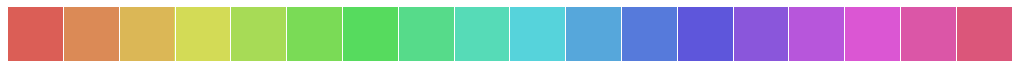

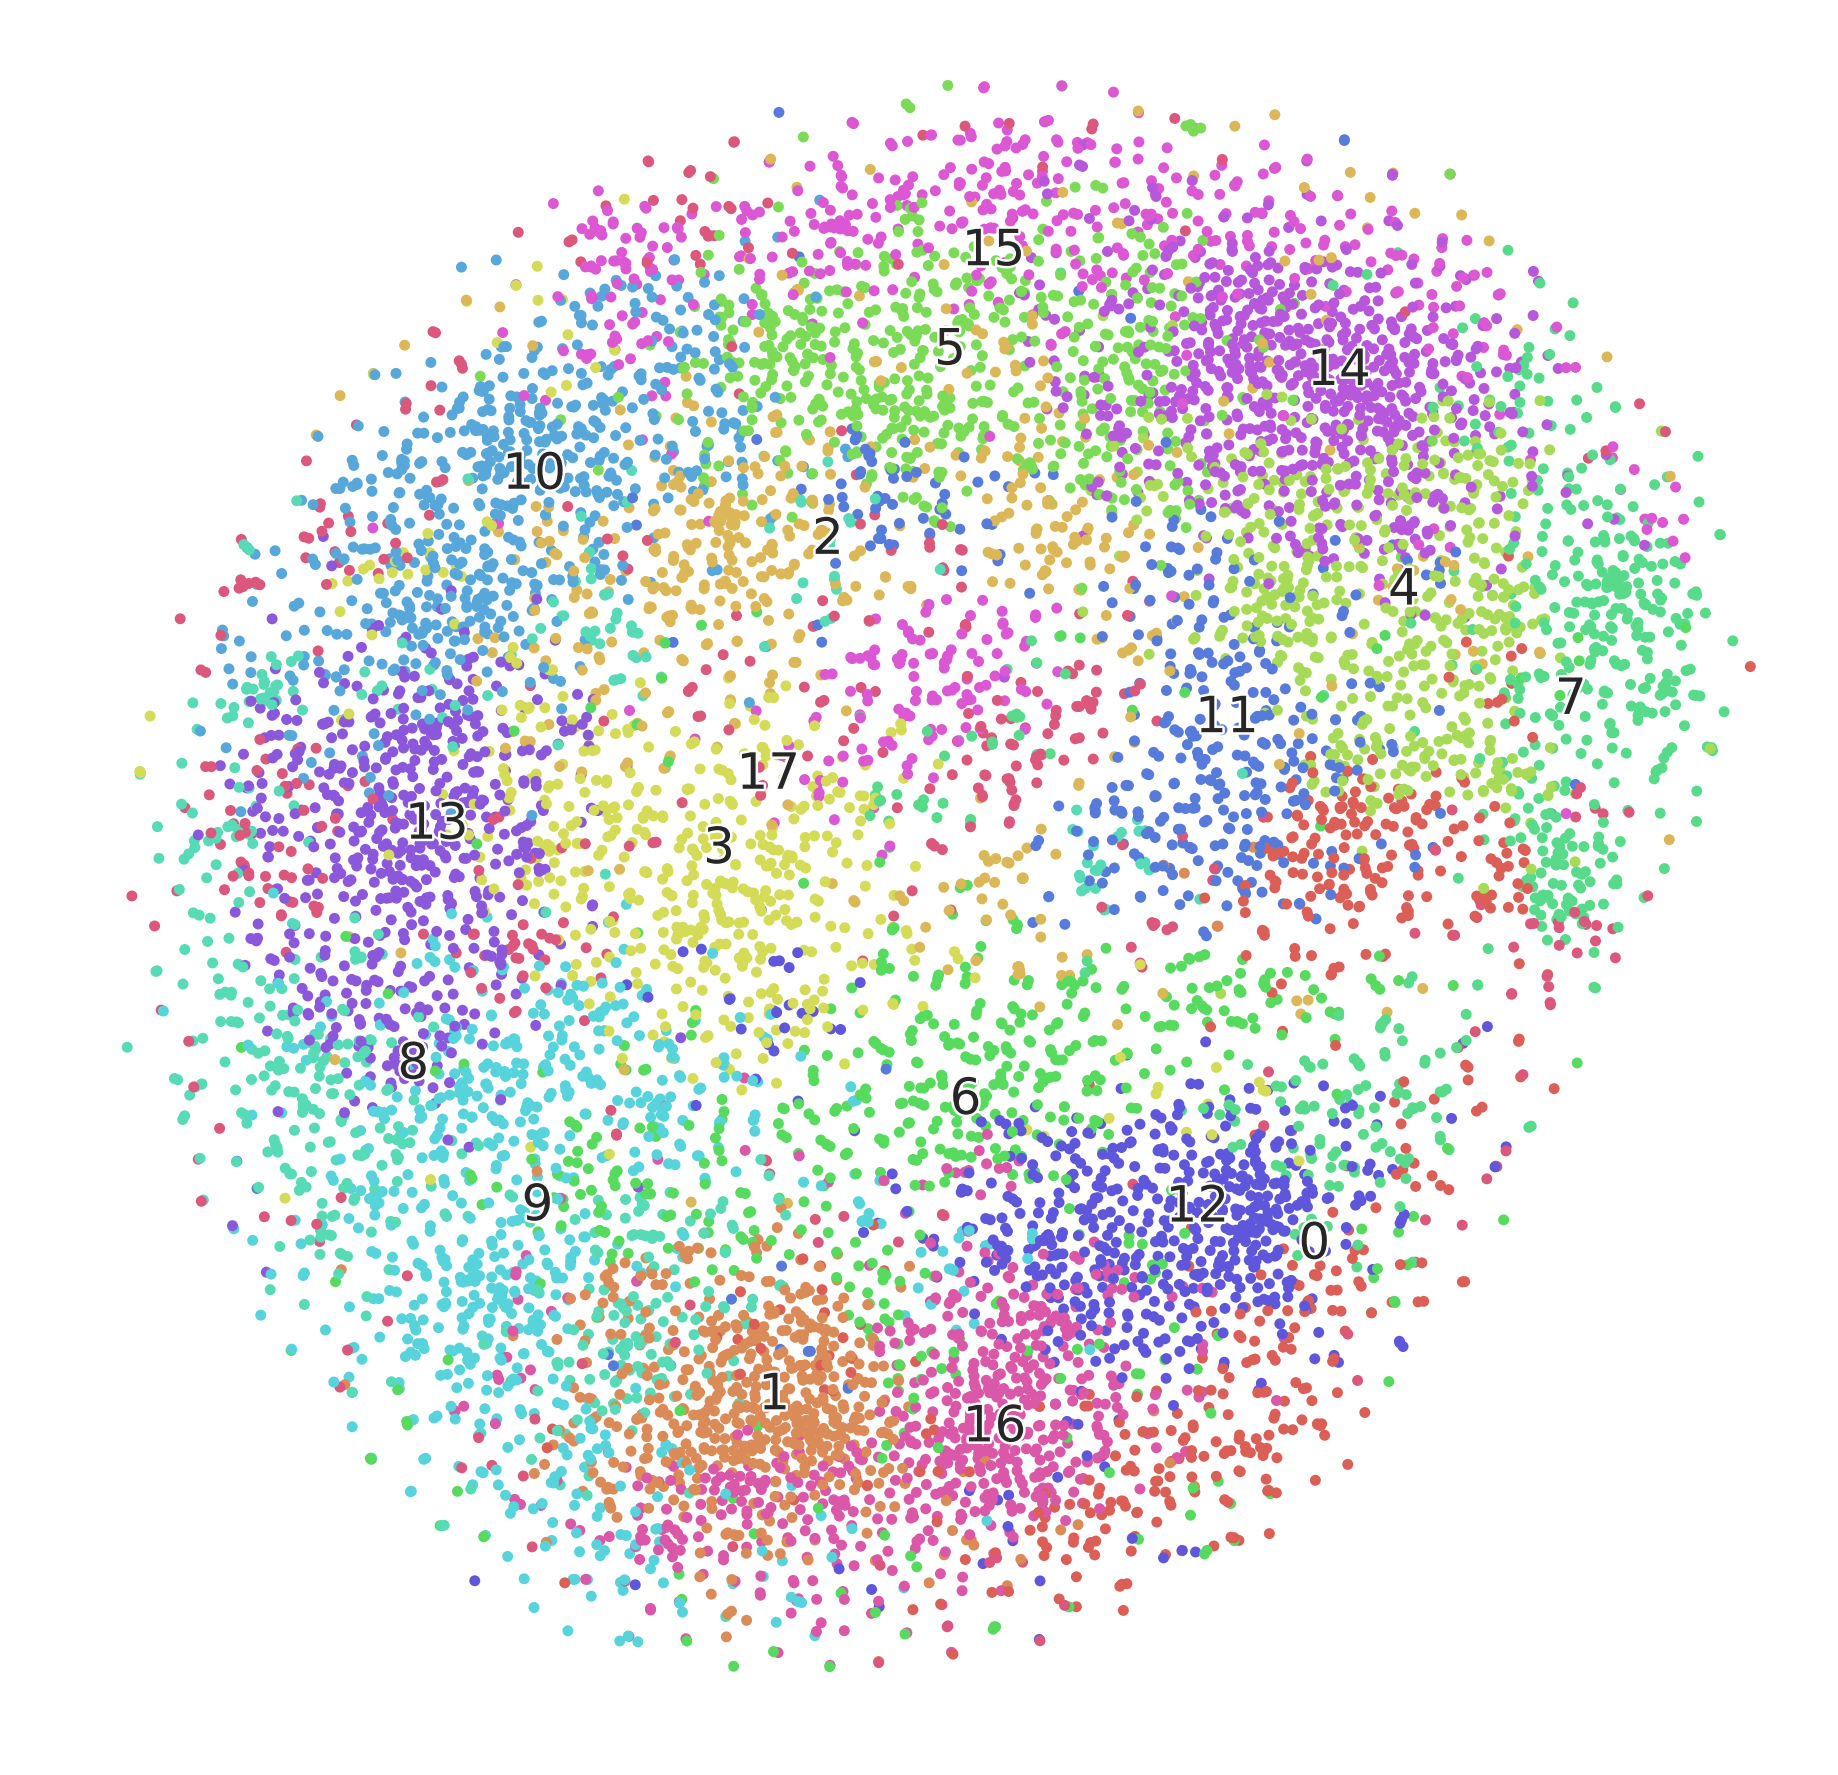

In [ ]:
print(list(range(0,18)))
sns.palplot(np.array(sns.color_palette("hls", 18)))
scatter(digits_proj, Y)
plt.savefig('digits_tsne-generated_18_cluster.png', dpi=120)

In [ ]:
Y.shape

(9998,)

In [ ]:
Y==1

array([False, False, False, ..., False,  True, False])

In [ ]:
for idx,word in reverse_index.items():
    if idx <= 9998 :
        if Y[idx]==12:
            print(word)

stern
hong
bottom
else's
climbs
raunchy
otto
ensuing
paul's
indifference
pleasures
parents
haunt
turkish
gays
porno
reasonable
daniel
flawless
imaginative
tomorrow
teamed
ideals
lugosi
darkly
ken
nightclub
consists
third
aids
gandolfini
stunts
turgid
box
hardcore
ton
godfather
charm
abusive
underused
stripped
utterly
fat
sexual
expense
ben's
ocean
heston
feminist
esther
fiancé
refused
virus
'73
hi
limit
bounty
causing
bomb
pirate
incompetent
betrayal
shifting
solved
afford
padding
rival
damon
reasoning
truths
thereafter
cover
relevance
santa
mature
actors
dudley
sent
thieves
raid
sends
lucille
zone
theaters
seuss
seldom
comics
weaknesses
sympathy
genre
elsa
click
cloud
patricia
meteor
vulnerability
grease
hood
ie
if
fireworks
sticks
skip
skit
gotta
middle
gloria
remote
titled
participants
shoddy
grave
mindset
vaudeville
contempt
timing
yearning
exploited
toni
1983
bug
path
god
peers
interspersed
asking
boogeyman
dolls
helmet
design
thankfully
arrives
dorothy
arguably
wealthy
intentiona

IndexError: index 9998 is out of bounds for axis 0 with size 9998